## Task 3.2

This notebook contains tests and results related to Task 3.2

 For all algorithms as performance measure use Balanced Accuracy. The models should be trained
 on training set. The performance measure should be calculated on test set. Please average the results
 over at least 5 train-test splits. If the given algorithm does not converge, within 500 iterations, stop the
 algorithm and use the solutions from the last iteration.

In [1]:
import numpy as np
import pandas as pd
from models import IRLS
from models import SGD
from models import ADAM
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
import datasets.read as data
from matplotlib import pyplot as plt

splits = np.arange(0.1, 0.55, 0.05)

def test_balanced_accuracy(X, y, splits, dataset_name):
  irls_acc = []
  sgd_acc = []
  adam_acc = []

  for split in splits:
    print(f'Test size: {split:.2f}')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, stratify=y)
    irls = IRLS()
    sgd = SGD()
    adam = ADAM()
    irls.fit(X_train, y_train)
    sgd.fit(X_train, y_train)
    adam.fit(X_train, y_train)
    y_pred_irls = irls.predict(X_test)
    y_pred_sgd = sgd.predict(X_test)
    y_pred_adam = adam.predict(X_test)
    irls_acc.append(balanced_accuracy_score(y_test, y_pred_irls))
    sgd_acc.append(balanced_accuracy_score(y_test, y_pred_sgd))
    adam_acc.append(balanced_accuracy_score(y_test, y_pred_adam))

  df = pd.DataFrame({'IRLS': irls_acc, 'SGD': sgd_acc, 'ADAM': adam_acc})
  test_csv_file = 'task3.2_results/'+ dataset_name +'_history.csv'
  with open(test_csv_file, mode='w') as f:
        df.to_csv(f)
  return df

def plt_boxplots(df, dataset_name):
  plt.boxplot(df, labels=df.columns)
  plt.title(f'Balanced Accuracy on dataset {dataset_name}')
  plt.ylabel('Balanced Accuracy');

## 1. Rice Cammeo Osmancik

Test size: 0.10
Test size: 0.15
Test size: 0.20
Test size: 0.25
Test size: 0.30
Test size: 0.35
Test size: 0.40
Test size: 0.45
Test size: 0.50


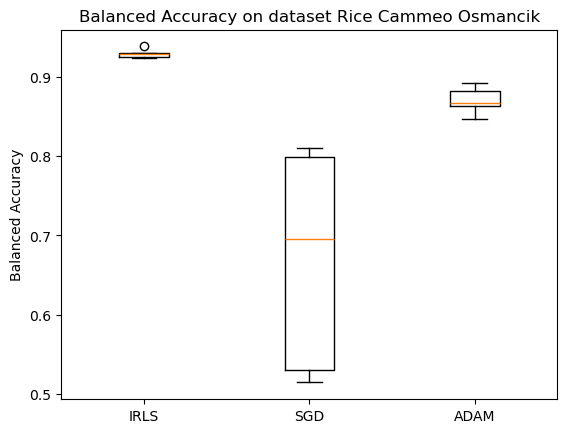

In [2]:
dataset = 'Rice Cammeo Osmancik'
X, y = data.read_Rice_Cammeo_Osmancik("datasets/")
test1 = test_balanced_accuracy(X, y, splits, dataset)
plt_boxplots(test1, dataset)

## 2. Statlog (Shuttle)

In [3]:
dataset = 'Statlog (Shuttle)'
X, y = data.read_Statlog_Shuttle("datasets/")
test2 = test_balanced_accuracy(X, y, splits, dataset)
plt_boxplots(test2, dataset)

Removing feature 2.0 with VIF 32579.038390905396
Removing feature 7.0 with VIF 8612.831759802706
Removing feature 0.0 with VIF 3215.465795857351
Test size: 0.10


KeyboardInterrupt: 

## 3. Banknote authentication

In [ ]:
dataset = 'Banknote authentication'
X, y = data.read_Banknote_Authentication("datasets/")
test3 = test_balanced_accuracy(X, y, splits, dataset)
plt_boxplots(test3, dataset)

## 4. Online Shoppers Purchasing Intention Dataset

In [ ]:
dataset = 'Online Shoppers Purchasing Intention'
X, y = data.read_Online_Shoppers_intention("datasets/")
test4 = test_balanced_accuracy(X, y, splits, dataset)
plt_boxplots(test4, dataset)

## 5. EEG Eye State

In [ ]:
dataset = 'EEG Eye State'
X, y = data.read_EEG_Eye_State("datasets/")
test5 = test_balanced_accuracy(X, y, splits, dataset)
plt_boxplots(test5, dataset)

## 6. Web Page Phishing Dataset

In [ ]:
dataset = 'Web Page Phishing'
X, y = data.read_Web_Page_Phishing("datasets/")
test6 = test_balanced_accuracy(X, y, splits, dataset)
plt_boxplots(test6, dataset)

## 7. Airline Satisfaction Dataset

In [ ]:
dataset = 'Airline Satisfaction'
X, y = data.read_Airline_Passenger_Satisfaction("datasets/")
test7 = test_balanced_accuracy(X, y, splits, dataset)
plt_boxplots(test7, dataset)

## 8. Dataset for Link Phishing

In [ ]:
dataset = 'Dataset for Link Phishing'
X, y = data.read_Dataset_for_Link_Phishing("datasets/")
test8 = test_balanced_accuracy(X, y, splits, dataset)
plt_boxplots(test8, dataset)

## 9. Optdigits

In [ ]:
dataset = 'Optdigits'
X, y = data.read_Optdigits("datasets/")
test8 = test_balanced_accuracy(X, y, splits, dataset)
plt_boxplots(test8, dataset)